In [1]:
from data import train_input_func, eval_input_fn, predict_input_fn
from capsule_net import model_fn
import tensorflow as tf

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist\train-labels-idx1-ubyte.gz
Extracting ./mnist\t10k-images-idx3-ubyte.gz
Extracting ./mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


## Defining Model
Defining the estimator for Capsule Net. Here:
- alpha: represents the scaling factor of Reconstruction loss so that Margin loss dominates
- m_plus: is the $m^+$ value of Margin loss
- m_minus: is the $m_{-}$ value of Margin loss
- rounds: are the number of Routing by Agreement algorithm rounds

In [2]:
mnist_caps_net = tf.estimator.Estimator(model_fn=model_fn,
                                        params={
                                            'alpha': 0.0005,
                                            'm_plus': 0.9,
                                            'm_minus': 0.1,
                                            'rounds': 2
                                        },
                                        model_dir='./caps2ra')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': './caps2ra', '_log_step_count_steps': 100, '_session_config': None, '_master': '', '_train_distribute': None, '_save_checkpoints_steps': None, '_num_worker_replicas': 1, '_service': None, '_save_summary_steps': 100, '_task_id': 0, '_keep_checkpoint_every_n_hours': 10000, '_num_ps_replicas': 0, '_save_checkpoints_secs': 600, '_evaluation_master': '', '_task_type': 'worker', '_is_chief': True, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002A6994F1470>, '_tf_random_seed': None, '_global_id_in_cluster': 0, '_keep_checkpoint_max': 5}


## Training the model
The model is trained for 4000 steps (batches) each of size 32. Given that MNIST have 60000 training images. So,

$$Epochs = \dfrac{4000}{\frac{60000}{32}} = \dfrac{4000}{1875} = 2.133$$

In [3]:
mnist_caps_net.train(input_fn=train_input_func, steps=4000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into ./caps2ra\model.ckpt.
INFO:tensorflow:loss = 0.809473, step = 0
INFO:tensorflow:global_step/sec: 0.88728
INFO:tensorflow:loss = 0.0593823, step = 100 (112.780 sec)
INFO:tensorflow:global_step/sec: 0.975555
INFO:tensorflow:loss = 0.0274678, step = 200 (102.434 sec)
INFO:tensorflow:global_step/sec: 0.666101
INFO:tensorflow:loss = 0.025879, step = 300 (150.219 sec)
INFO:tensorflow:global_step/sec: 0.65105
INFO:tensorflow:loss = 0.0151074, step = 400 (153.590 sec)
INFO:tensorflow:Saving checkpoints for 463 into ./caps2ra\model.ckpt.
INFO:tensorflow:global_step/sec: 0.784998
INFO:tensorflow:loss = 0.015997, step = 500 (127.348 sec)
INFO:tensorflow:global_step/sec: 0.854247
INFO:tensorflow:loss = 0.0167206, step =

## Evaluating

In [3]:
eval_res = mnist_caps_net.evaluate(input_fn=eval_input_fn)

eval_res

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-14-20:10:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./caps2ra\model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-14-20:12:14
INFO:tensorflow:Saving dict for global step 4000: global_step = 4000, loss = 0.00835403


{'global_step': 4000, 'loss': 0.0083540259}

#### Let's Display some Reconstructions of Decoder

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from data import pred_labels
%matplotlib inline

In [4]:
imgs = []

preds = mnist_caps_net.predict(input_fn=predict_input_fn)

for i in preds:
    imgs.append(i['reconstruction'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./caps2ra\model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


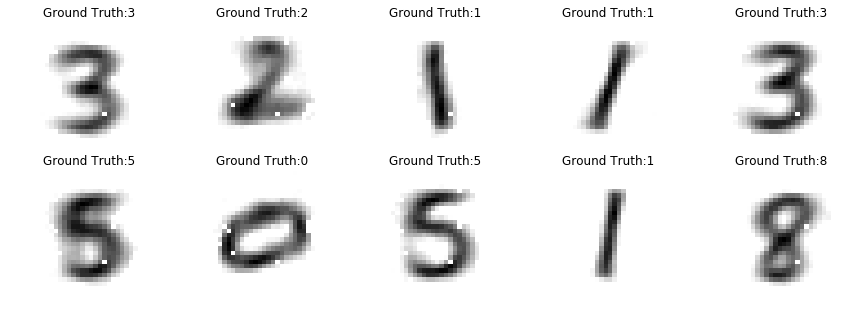

In [9]:
imgs = np.asarray(imgs)

indices = np.random.randint(pred_labels.shape[0], size=10)

plt.figure(figsize=(15, 5))
for i, index in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(imgs[index].reshape(28, 28), cmap='binary')
    plt.axis('off')
    plt.title('Ground Truth:' + str(pred_labels[index]))
plt.show()